# STOCK ANALYSIS OF NYKAA

#### IMPORTING ALL THE REQUIRED LIBRARIES

In [1]:
import pandas as pd  #for data manipulation and analysis
import yfinance as yf   #used for fetching financial data from Yahoo Finance. 
import seaborn as sns   #for creating informative and attractive statistical graphics
import matplotlib.pyplot as plt  #for creating basic visualizations
import plotly.graph_objects as go   #provides a flexible and powerful interface for constructing various types of plots and figures. 
import plotly.express as px  # generating complex visualizations with minimal code

#### 

In [2]:
start_date="2021-11-10"   # this specifies the start date of the dataset
end_date="2023-11-24"     #this specifies the end date of the dataset
company="NYKAA.NS"        #specifies the name of the company

##### downloading the dataset

In [3]:
data=yf.download("NYKAA.NS",start_date,end_date)   #download historical market data for a stock symbol from Yahoo Finance.

[*********************100%%**********************]  1 of 1 completed


### 

##### loading the first 5 rows

In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-10,336.333344,374.666656,333.333344,367.633331,367.633331,205947786
2021-11-11,368.950012,373.450012,340.625000,368.924988,368.924988,43138662
2021-11-12,374.666656,401.658325,363.350006,393.049988,393.049988,34978218
2021-11-15,376.833344,388.733337,364.166656,380.375000,380.375000,20735118
2021-11-16,378.000000,385.000000,371.333344,372.791656,372.791656,9042750


### 

##### specifying the shape of the dataset

In [5]:
data.shape

(506, 6)

##### 

##### specifying the name of the columns present in the dataset

In [6]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

##### 

##### Displaying the datatypes of the columns

In [7]:
data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

##### 

##### using the describe method to get the description of the dataset

In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,506.000000,506.000000,506.000000,506.000000,506.000000,5.060000e+02
mean,204.739954,208.702470,199.974078,203.996015,203.996015,8.673235e+06
std,72.946622,75.038461,70.613377,72.753347,72.753347,1.313623e+07
min,116.500000,119.449997,114.250000,115.949997,115.949997,0.000000e+00
25%,144.224998,146.699997,141.237503,143.962498,143.962498,2.768450e+06
50%,183.500000,189.420830,173.787506,181.150002,181.150002,5.031742e+06
75%,240.791664,245.000000,234.645836,240.295830,240.295830,9.342297e+06
max,422.500000,428.950012,410.000000,415.516663,415.516663,2.059478e+08


##### 

##### using the .info() method to get the information about the dataset

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 506 entries, 2021-11-10 to 2023-11-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       506 non-null    float64
 1   High       506 non-null    float64
 2   Low        506 non-null    float64
 3   Close      506 non-null    float64
 4   Adj Close  506 non-null    float64
 5   Volume     506 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.7 KB


##### 

##### lets create a chart for the opening price of nykaa using Plotly Express

In [11]:
open_graph = px.line(data, x=data.index, y=data['Open'], title='Line Chart')
open_graph.update_layout(
    title='Opening Price of Nykaa',
    xaxis_title='Date',
    yaxis_title='Opening Price',
    xaxis_rangeslider_visible=True)
open_graph.show()

##### 

##### lets create a chart for the closing price of nykaa using Plotly Express

In [12]:
close_graph = px.line(data, x=data.index, y=data['Adj Close'], title='Line Chart')
close_graph.update_layout(
    title='Adjacent Closing Price of Nykaa',
    xaxis_title='Date',
    yaxis_title='Closing Price',
    xaxis_rangeslider_visible=True)
close_graph.show()

##### 

##### lets create a chart for the volume of shares of nykaa using Plotly Express

In [13]:
volume_graph = px.line(data, x=data.index, y=data['Volume'], title='Line Chart')
volume_graph.update_layout(
    title='Volume of shares of Nykaa',
    xaxis_title='Date',
    yaxis_title='Volume in millions',
    xaxis_rangeslider_visible=True)
volume_graph.show()

##### 

#####  Let us calculate 50-day rolling average and 200-day rolling average

In [14]:
#It creates a rolling window of specified size 
#It calculates the mean value within each rolling window of 50,200 days. It computes the average value of the 'Adj Close' prices for each day within a window that moves along the timeline.

In [18]:
data['mov_avg_50']=data['Adj Close'].rolling(window=50).mean()
data['mov_avg_200']=data['Adj Close'].rolling(window=200).mean()

(array([18993., 19083., 19174., 19266., 19358., 19448., 19539., 19631.]),
 [Text(18993.0, 0, '2022-01'),
  Text(19083.0, 0, '2022-04'),
  Text(19174.0, 0, '2022-07'),
  Text(19266.0, 0, '2022-10'),
  Text(19358.0, 0, '2023-01'),
  Text(19448.0, 0, '2023-04'),
  Text(19539.0, 0, '2023-07'),
  Text(19631.0, 0, '2023-10')])

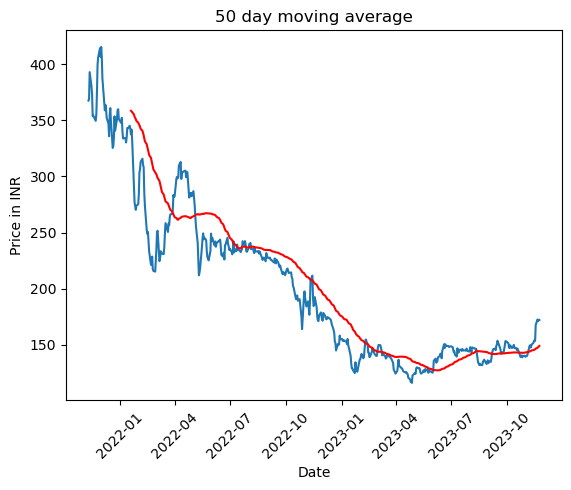

In [19]:
plt.plot(data.index, data['Close'], label='Close')
plt.plot(data.index, data['mov_avg_50'], label='50-day Moving Avg', color='red')
plt.title("50 day moving average")
plt.xlabel("Date")
plt.ylabel("Price in INR")
plt.xticks(rotation=45)

(array([18993., 19083., 19174., 19266., 19358., 19448., 19539., 19631.]),
 [Text(18993.0, 0, '2022-01'),
  Text(19083.0, 0, '2022-04'),
  Text(19174.0, 0, '2022-07'),
  Text(19266.0, 0, '2022-10'),
  Text(19358.0, 0, '2023-01'),
  Text(19448.0, 0, '2023-04'),
  Text(19539.0, 0, '2023-07'),
  Text(19631.0, 0, '2023-10')])

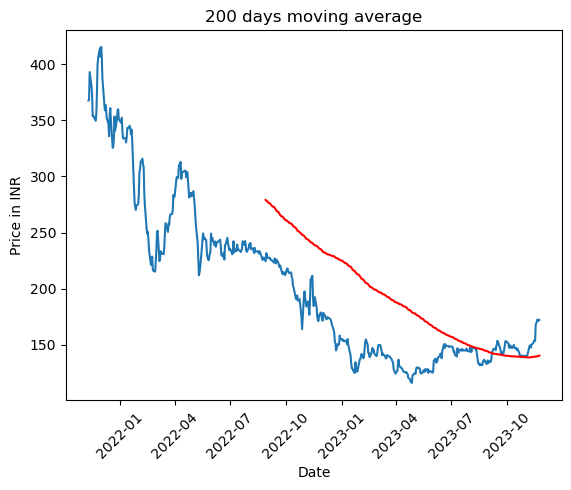

In [20]:
plt.plot(data.index, data['Close'], label='Close')
plt.plot(data.index, data['mov_avg_200'], label='200-day Moving Avg', color='red')
plt.title("200 days moving average")
plt.xlabel("Date")
plt.ylabel("Price in INR")
plt.xticks(rotation=45)

##### 

##### 

##### lets calculate the percentage chnage between the current and the previous closing and storing it in a new column

In [21]:
data['Daily_Returns'] = data['Adj Close'].pct_change()

In [22]:
data.head(2)

,Open,High,Low,Close,Adj Close,Volume,mov_avg_50,mov_avg_200,Daily_Returns
Date,,,,,,,,,
2021-11-10,336.333344,374.666656,333.333344,367.633331,367.633331,205947786,NaN,NaN,NaN
2021-11-11,368.950012,373.450012,340.625000,368.924988,368.924988,43138662,NaN,NaN,0.003513


##### 

##### lets create a chart for the daily returns of nykaa using Plotly Express

In [23]:
daily_returns_chart = px.line(data, x=data.index, y=data['Daily_Returns'], title='Line Chart')
daily_returns_chart.update_layout(
    title='Daily Returns of Nykaa',
    xaxis_title='Date',
    yaxis_title='Percentage',
    xaxis_rangeslider_visible=True)
daily_returns_chart.show()

##### 

##### 

##### lets create a user interactive variable that will take the numeric inputs in terms of number of days from the user,selection whether the user wants to see current data or historical data and accordingly plot the candlestick plot for the user based on their required days

##### 

In [24]:
# we use the plotly go.candlestick object to create a candlestick chart
def historical(period1):
    fig = go.Figure(data=[go.Candlestick(x=data.index,
                open=data['Open'].head(days),
                high=data['High'].head(days),
                low=data['Low'].head(days),
                close=data['Close'].head(days))])
    fig.show()
    
def current(period2):
    data1=data.tail(days)
    fig = go.Figure(data=[go.Candlestick(x=data1.index,
                open=data1['Open'].head(days),
                high=data1['High'].head(days),
                low=data1['Low'].head(days),
                close=data1['Close'].head(days))])
    fig.show()

##### 

In [13]:
#there are total 506 days
from ipywidgets import widgets
days=int(input('Enter the Number of Days for the Candlestick Chart : '))
period1=widgets.Button(description="historical")
period2=widgets.Button(description="current")
display(period1)
display(period2)
period1.on_click(historical)
period2.on_click(current)

Enter the Number of Days for the Candlestick Chart : 25


Button(description='historical', style=ButtonStyle())

Button(description='current', style=ButtonStyle())

##### 

##### 

In [ ]:
data.to_csv('nykaa_stock_data.csv')

##### 